In [698]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve , auc
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

LOADING DATA SET AND PREPROCESSING

In [665]:
df  = pd.read_csv(r"Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,15.0,249905295,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1G1FY6S03L,Kitsap,Kingston,WA,98346.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,0.0,23.0,141133765,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,5.303594e+10
2,KNDCE3LG9K,King,Seattle,WA,98125.0,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239.0,0.0,46.0,3410074,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1N4AZ0CP8E,Thurston,Olympia,WA,98506.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,22.0,182436474,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJXCAE29L,Kitsap,Silverdale,WA,98383.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293.0,0.0,23.0,1843054,POINT (-122.69275 47.65171),PUGET SOUND ENERGY INC,5.303509e+10


In [666]:
df.shape

(239747, 17)

In [667]:
df.isnull().sum()    #IT  CONTAIN NULL VALUES 

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        49
Base MSRP                                             49
Legislative District                                 515
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [668]:
df.duplicated().sum()    # there is no duplicate value

0

In [669]:
df.describe()  #DISCRIPTION OF DATA WITH COLUMN

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,239744.000000,239747.000000,239698.000000,239698.000000,239232.000000,2.397470e+05,2.397440e+05
mean,98176.643908,2021.460681,45.562283,770.534110,28.876643,2.363185e+08,5.297838e+10
std,2538.393709,2.995484,83.432590,7096.684269,14.896805,6.765169e+07,1.557184e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.071293e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.533600e+08,5.303303e+10
75%,98375.000000,2024.000000,38.000000,0.000000,42.000000,2.701756e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [670]:
# THIS COLUMN VIN(1-10) IT CONTAIN NO VALUE HENCE , IT IS BETTER TO DROP THIS COLUMN AS PER PREDICTION AND ANALYSIS 
df = df.drop(columns='VIN (1-10)')

In [671]:
df.isnull().sum()  #IT CONTAIN NULL VALUES 

County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        49
Base MSRP                                             49
Legislative District                                 515
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [695]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239176 entries, 0 to 239746
Data columns (total 11 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             239176 non-null  int32  
 1   City                                               239176 non-null  int32  
 2   Model Year                                         239176 non-null  int64  
 3   Make                                               239176 non-null  int32  
 4   Model                                              239176 non-null  int32  
 5   Electric Vehicle Type                              239176 non-null  int64  
 6   Clean Alternative Fuel Vehicle (CAFV) Eligibility  239176 non-null  int64  
 7   Electric Range                                     239176 non-null  float64
 8   Base MSRP                                          239176 non-null  float64
 9 

In [673]:
df = df.drop(columns='State')    # it is clear that the state is washinghton so it is better to remove it 

In [674]:
df['Postal code'] = df['Postal Code'].astype(str)
df['Postal Regions'] = df['Postal code'].str[:3]


LABEL ENCODER TO CONVERT COLUMNS INTO NUMERIC FOR MACHINE LEARNING MODEL

In [675]:
encod = LabelEncoder()
df['Postal Regions'] = encod.fit_transform(df['Postal Regions'])
df['City'] =encod.fit_transform(df['City'])
df['County']  =encod.fit_transform(df['County'])
df['Make'] = encod.fit_transform(df['Make'])
df['Model'] = encod.fit_transform(df['Model'])

In [676]:
df = df.drop(columns ='Postal code')

In [677]:
df[['County' , 'City' , 'Postal Regions']].corr()  


,County,City,Postal Regions
County,1.000000,-0.173393,0.021583
City,-0.173393,1.000000,0.202853
Postal Regions,0.021583,0.202853,1.000000


Text(0.5, 1.0, 'it contain electric range with its two value 0 and 1 in boxplot')

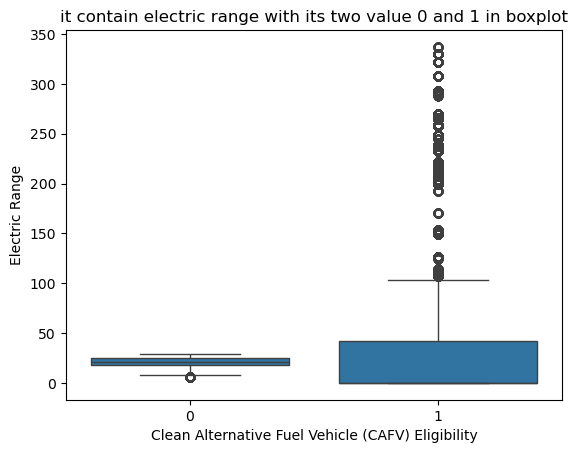

In [678]:
sns.boxplot(x=y, y=X['Electric Range'])
plt.title("it contain electric range with its two value 0 and 1 in boxplot")

MAPPING THE CATEGORY IN A COLUMN WITH NUMBER

In [679]:
tt = {
    'Battery Electric Vehicle (BEV)':0,
    'Plug-in Hybrid Electric Vehicle (PHEV)':1

}
df['Electric Vehicle Type']  = df['Electric Vehicle Type'].map(tt)

In [680]:
dd = {
    'Eligibility unknown as battery range has not been researched' : 1,
    'Clean Alternative Fuel Vehicle Eligible' : 1,
    'Not eligible due to low battery range': 0
}
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map(dd)

In [681]:
df = df.drop(columns = ['DOL Vehicle ID', 'Vehicle Location' , '2020 Census Tract' , 'Electric Utility','Postal Code'])  #SINCE UNIQUE VEHICLE ID WILL NOT CONTRIBUTE IN ML MODEL

TO CHECK OUTLIERS 

Text(0.5, 1.0, 'Analysis of outlier')

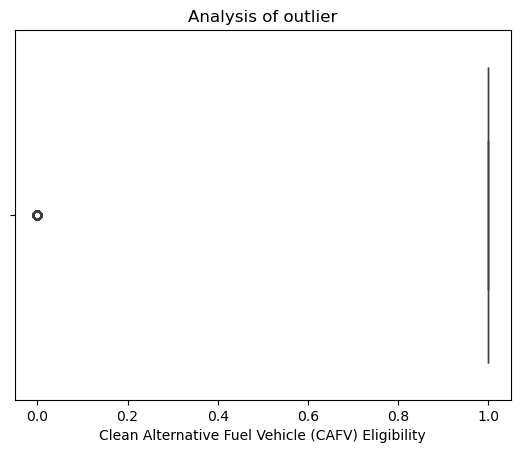

In [682]:
sns.boxplot(x = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
plt.title("Analysis of outlier")

Text(0.5, 1.0, 'bocplot to check outlier in the df ')

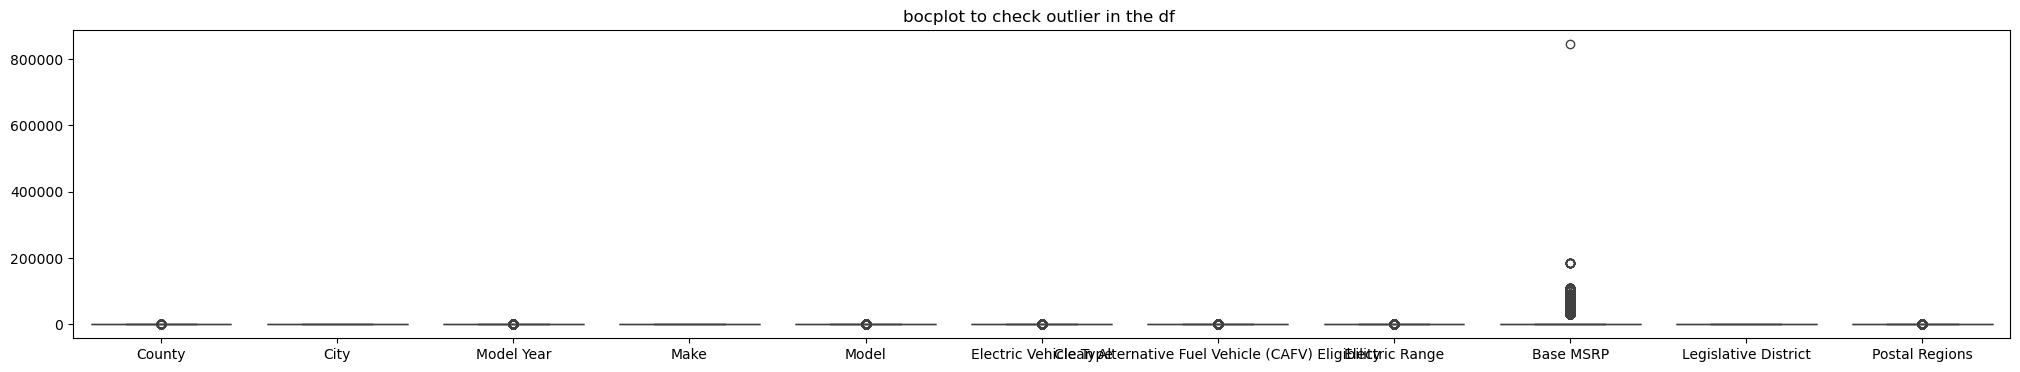

In [683]:
plt.figure(figsize = (25,4))
sns.boxplot(df)
plt.title("bocplot to check outlier in the df ")

In [684]:
df.corr()

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Postal Regions
County,1.000000,-0.173393,-0.010388,-0.016625,-0.015175,-0.002555,0.000515,-0.006838,-0.001233,-0.098395,0.021583
City,-0.173393,1.000000,-0.005482,-0.043254,0.004135,0.047172,-0.028952,0.000807,-0.006163,0.005888,0.202853
Model Year,-0.010388,-0.005482,1.000000,0.075883,0.039921,-0.148099,0.168851,-0.532390,-0.227054,-0.012793,-0.044380
Make,-0.016625,-0.043254,0.075883,1.000000,0.216724,-0.328308,0.167580,0.046728,0.017745,0.038356,-0.061688
Model,-0.015175,0.004135,0.039921,0.216724,1.000000,0.308292,-0.061421,-0.073351,-0.005636,-0.007680,-0.005466
Electric Vehicle Type,-0.002555,0.047172,-0.148099,-0.328308,0.308292,1.000000,-0.636193,-0.087182,0.035472,-0.056396,0.084852
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0.000515,-0.028952,0.168851,0.167580,-0.061421,-0.636193,1.000000,0.097623,-0.076472,0.035605,-0.057918
Electric Range,-0.006838,0.000807,-0.532390,0.046728,-0.073351,-0.087182,0.097623,1.000000,0.116458,0.015603,0.012867
Base MSRP,-0.001233,-0.006163,-0.227054,0.017745,-0.005636,0.035472,-0.076472,0.116458,1.000000,0.009744,-0.002623
Legislative District,-0.098395,0.005888,-0.012793,0.038356,-0.007680,-0.056396,0.035605,0.015603,0.009744,1.000000,-0.408145


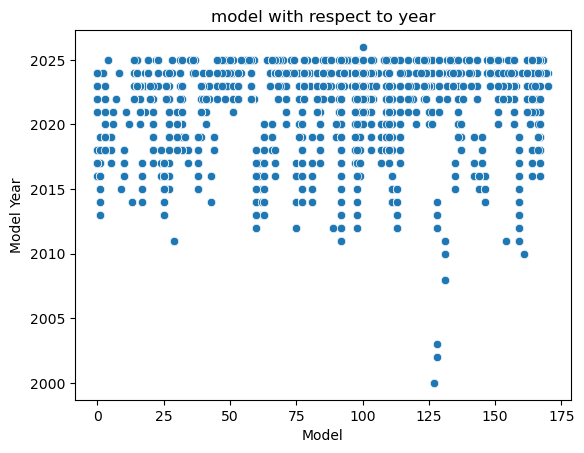

In [685]:
sns.scatterplot(x = df['Model'], y = df['Model Year'] )
plt.title("model with respect to year")
plt.show()

Text(0.5, 14.722222222222216, 'heatmap of dataset')

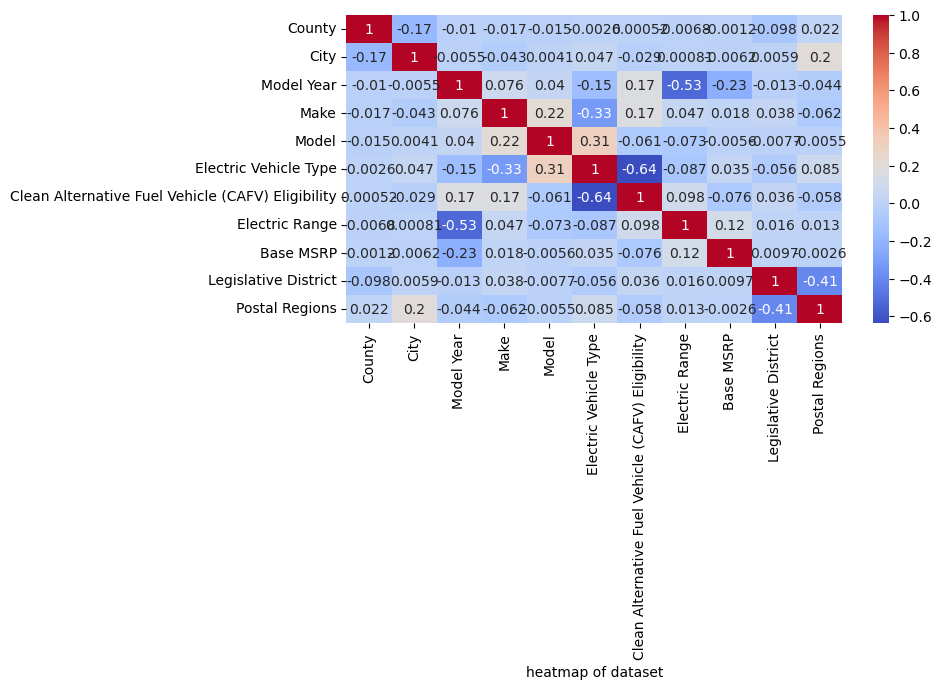

In [686]:
plt.figure(figsize =(8,4))
sns.heatmap(df.corr() , annot  = True , cmap  = 'coolwarm')
plt.xlabel("heatmap of dataset")

CHECKING BALANCE OF DATA/TARGET VALUE TO BUILD MACHINE LEARNING MODEL ON IT 

In [687]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle (CAFV) Eligibility
1    216307
0     22869
Name: count, dtype: int64

LOGISTIC REGRESSION 

In [688]:
X = df.drop(['Clean Alternative Fuel Vehicle (CAFV) Eligibility'], axis = 1)
y = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']
X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size=0.2, random_state=42)

In [689]:
logist = LogisticRegression(class_weight='balanced')
logist.fit(X_train , y_train)
y_pred = logist.predict(X_test)
print("accuracy score for logistic regression is : ", accuracy_score(y_test , y_pred))
print('classification report :', classification_report(y_test , y_pred))

accuracy score for logistic regression is :  0.6947487248097667
classification report :               precision    recall  f1-score   support

           0       0.19      0.66      0.29      4604
           1       0.95      0.70      0.81     43232

    accuracy                           0.69     47836
   macro avg       0.57      0.68      0.55     47836
weighted avg       0.88      0.69      0.76     47836



c:\Users\mansi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


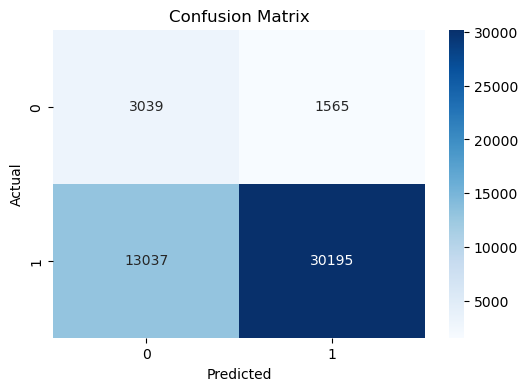

In [690]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

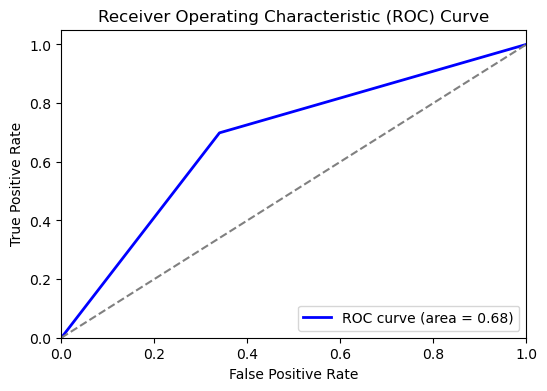

In [691]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

IT SHOWS BIASED DATA TOWARDS 1 , EITHER SMOTE OR ANOTHER MODEL CAN WORK ON IT

In [692]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Optional: Check new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({1: 151421, 0: 16002})
After SMOTE: Counter({0: 151421, 1: 151421})


KNN MODEL 


In [693]:

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_resampled, y_train_resampled)


y_pred = knn.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9943416999986063

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      6867
           1       1.00      1.00      1.00     64886

    accuracy                           0.99     71753
   macro avg       0.98      0.99      0.98     71753
weighted avg       0.99      0.99      0.99     71753


Confusion Matrix:
 [[ 6785    82]
 [  324 64562]]


In [694]:

cv_scores = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print(f"Cross-validation scores: {cv_scores}")

# Print the mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation: {np.std(cv_scores):.2f}")


Cross-validation scores: [0.99729234 0.99752349 0.99714371 0.99702813 0.99730881]
Mean Accuracy: 1.00
Standard Deviation: 0.00


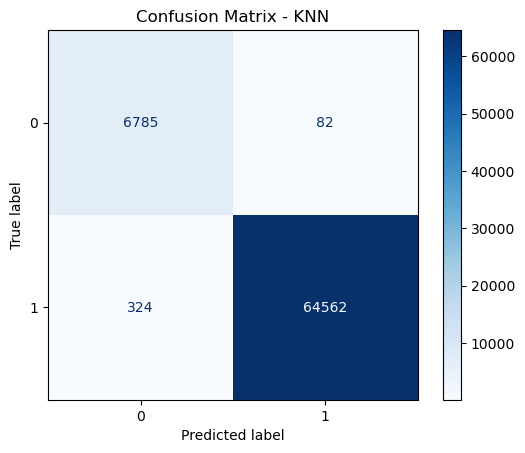

In [699]:
y_probs = knn.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()

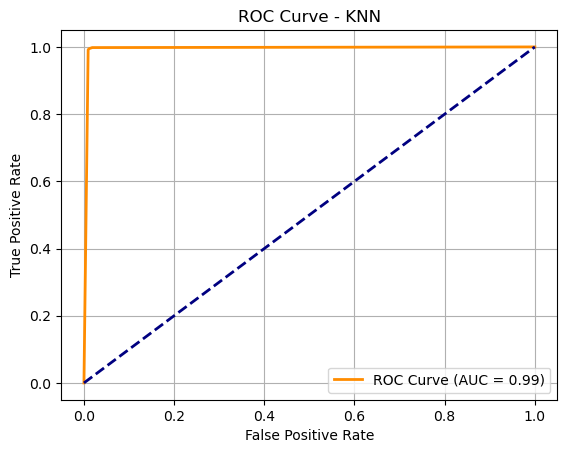

In [700]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.grid()
plt.show()